<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

## **Tugas *3*: *Regresi***

### **Tenggat Waktu: 18 November 2021, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama.ipynb**. Contoh: F_Tugas1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **18 November 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Muhammad Irfan Junaidi"
KELAS = "A"
NPM = "1906293202"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = [
    "1906350824",
    "1906353776"
]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "https://hackernoon.com/practical-machine-learning-ridge-regression-vs-lasso-a00326371ece"
]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Irfan Junaidi dari kelas A dengan NPM 1906293202, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Irfan Junaidi)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [4]:
cancer = pd.read_csv('cancer_reg.csv')

## **Preprocessing**

### Nomor 1
[10] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah atribut (numerik & kategorik), jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

In [5]:
print("Deskripsi setiap atribut")
display(cancer.describe(include=(np.number, np.object)))
print("-"*100)

print(f"Jumlah atribut numerik: {len(cancer.select_dtypes(include=(np.number)).columns)}")
print(f"Jumlah atribut kategorik: {len(cancer.select_dtypes(include=(np.object)).columns)}")
print("-"*100)

print("Jumlah missing values pada tiap column")
display(cancer.isnull().sum())
print("-"*100)

print("Banyaknya data duplikat")
print(pd.value_counts(cancer.duplicated()))
print("-"*100)

def count_outlier(df, col):
    iqr = (df[col].quantile(0.75) - df[col].quantile(0.25))
    upper = df[col].quantile(0.75) + (iqr * 1.5)
    lower = df[col].quantile(0.25) - (iqr * 1.5)
    return ((df[col] < lower) | (df[col] > upper)).sum()

print("Banyaknya outlier")
for i in cancer.select_dtypes(include=np.number).columns:
    print(f"{i:25s}{count_outlier(cancer, i)}")
print("-"*100)

Deskripsi setiap atribut


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(45201, 48021.6]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,306,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,NaN,45.272333,...,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,1.467017,2.084345
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,NaN,45.304480,...,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,0.498993,0.737185
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,NaN,22.300000,...,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,1.000000,1.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,NaN,37.700000,...,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,1.000000,2.000000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,NaN,41.000000,...,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,1.000000,2.000000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,NaN,44.000000,...,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,2.000000,3.000000


----------------------------------------------------------------------------------------------------
Jumlah atribut numerik: 34
Jumlah atribut kategorik: 2
----------------------------------------------------------------------------------------------------
Jumlah missing values pada tiap column


avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

----------------------------------------------------------------------------------------------------
Banyaknya data duplikat
False    3047
dtype: int64
----------------------------------------------------------------------------------------------------
Banyaknya outlier
avgAnnCount              461
avgDeathsPerYear         349
TARGET_deathRate         64
incidenceRate            93
medIncome                122
popEst2015               412
povertyPercent           69
studyPerCap              504
MedianAge                93
MedianAgeMale            89
MedianAgeFemale          78
AvgHouseholdSize         201
PercentMarried           68
PctNoHS18_24             69
PctHS18_24               52
PctSomeCol18_24          31
PctBachDeg18_24          94
PctHS25_Over             31
PctBachDeg25_Over        82
PctEmployed16_Over       20
PctUnemployed16_Over     68
PctPrivateCoverage       21
PctPrivateCoverageAlone  4
PctEmpPrivCoverage       9
PctPublicCoverage        18
PctPublicCoverageAlone   

### Nomor 2
[5] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil regresi yang maksimal.

In [6]:
cancer_cleaned = pd.DataFrame(data=cancer, columns=cancer.columns)

cancer_cleaned.drop(["PctSomeCol18_24", "PctPrivateCoverageAlone"], axis=1, inplace=True)

# Mengganti Null Values dengan Modus pada kolom kategorik
modus = cancer_cleaned[~cancer_cleaned.isna()].mode(0)
for c in cancer_cleaned.select_dtypes(include=np.object):
    cancer_cleaned[c] = cancer_cleaned[c].fillna(modus[c])

# Mengganti Null Values dengan Median pada kolom numerik
for c in cancer_cleaned.select_dtypes(include=np.number):
    median = cancer_cleaned[~cancer_cleaned.isna()].median()[0]
    cancer_cleaned[c] = cancer_cleaned[c].fillna(median)

# Mengubah data kategorik menjadi numerik
for c in cancer_cleaned.select_dtypes(include=np.object):
    le = LabelEncoder() 
    le.fit(list(cancer_cleaned[c].values)) 
    cancer_cleaned[c].loc[:] = le.transform(list(cancer_cleaned[c].values))

display(cancer_cleaned)

C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,8,39.3,...,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,1,2
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,5,33.0,...,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,1,2
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,5,45.0,...,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,1,2
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,3,42.8,...,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,2,3
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,5,48.3,...,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,4,44.2,...,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512,1,1
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,5,30.4,...,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470,1,1
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,6,30.9,...,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192,1,1
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,5,39.0,...,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938,1,2


### Nomor 3
[10] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data sebelum pemrosesan lebih lanjut, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!

<AxesSubplot:>

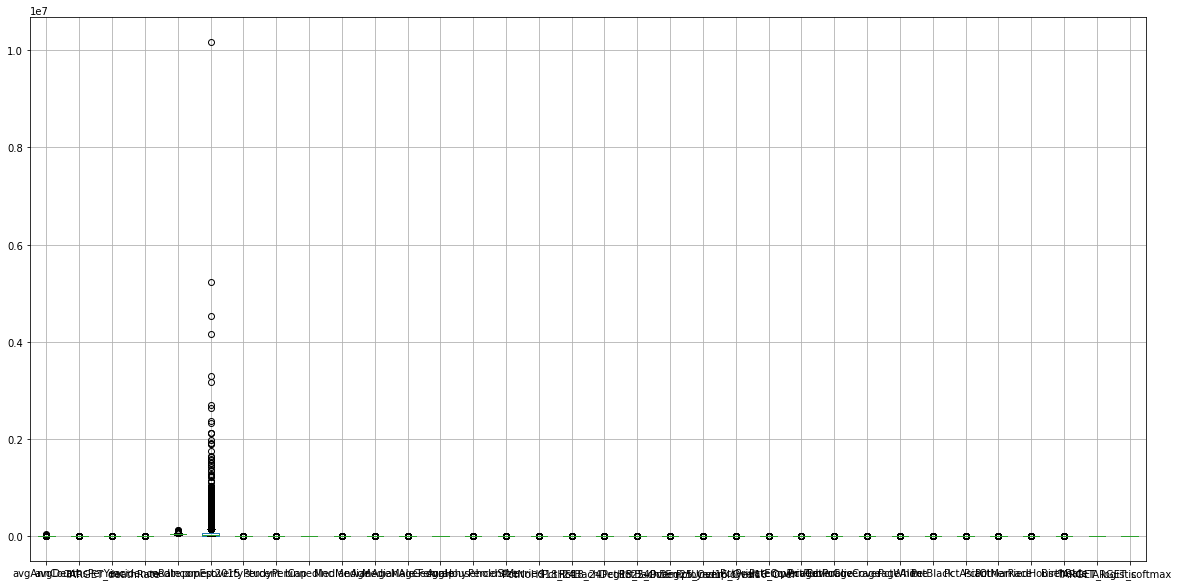

In [7]:
cancer_cleaned.boxplot(figsize=(20, 10))

Butuh. Karena jika dilihat pada boxplot diatas terdapat kolom yang memiliki skala yang berbeda. Dengan skala yang sama, tiap feature akan dianggap sama pentingnya dalam machine learning sehingga tidak ada data yang lebih diprioritaskan/dihilangkan. Terlihat bahwa salah satu feature pada boxplot di atas skalanya sangat besar, sehingga perlu dinormalisasikan.

Bentuk normalisasi yang dapat dilakukan adalah Standarisasi menggunakan RobustScaler. RobustScaler digunakan karena terdapat beberapa outlier dengan nilai yang cukup tinggi sehingga apabila menggunakan StandarScaler kurang baik akibat penggunaan mean dalam perhitungan.

## **Regresi**
(Penggunaan library diperbolehkan). Gunakan TARGET_deathRate sebagai kolom target.

### Nomor 1
[15] Implementasikan Linear Regression pada data hasil preprocessing. Gunakan Method dari library sklearn.

a. Tampilkan visualisasi hasil prediksi

b. Tampilkan nilai MSE, MAE, RMSE, dan R2 Square

,Actual,Predicted
2455,161.5,160.248694
671,136.4,160.003525
884,180.0,172.604767
618,165.0,159.892891
344,189.2,197.731172
...,...,...
973,165.0,164.307898
237,196.1,169.979120
1051,158.4,133.263337
593,152.8,164.467105


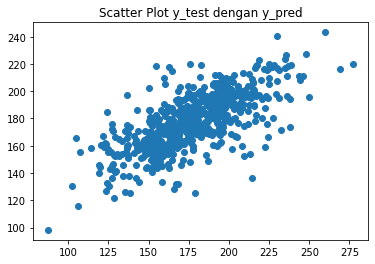

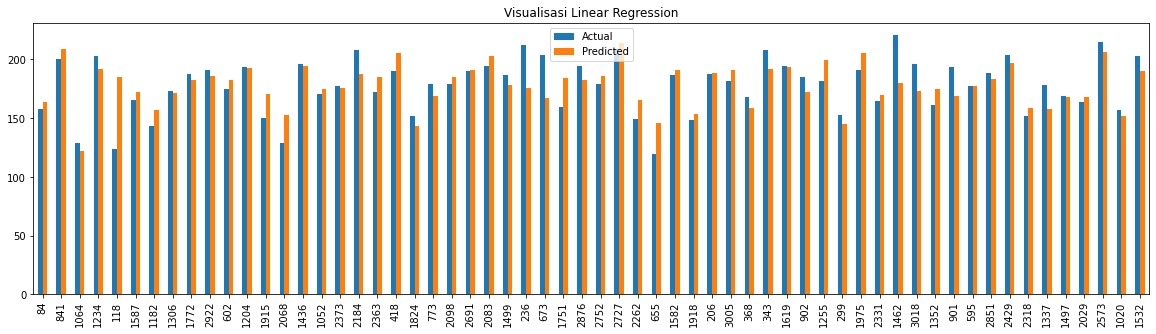

In [8]:
# Memisahkan atribut target (Y) dengan atribut predictor (X)
X = cancer_cleaned.drop(['TARGET_deathRate', 'TARGET_logistic', 'TARGET_softmax'], axis=1)
y = cancer_cleaned['TARGET_deathRate']

X_normal = RobustScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=123)

Lin_regr = LinearRegression() 
Lin_regr.fit(X_train, y_train)

y_pred = Lin_regr.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df1)

plt.scatter(y_test, y_pred)
plt.title("Scatter Plot y_test dengan y_pred")
plt.show()

df1.sample(n=60).plot(kind='bar',figsize=(20,5))
plt.title("Visualisasi Linear Regression")
plt.show()

In [9]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Square:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 397.51104064293287
Mean Absolute Error: 14.89067460048883
Root Mean Squared Error: 19.937678918142225
R2 Square: 0.48692642724836444


### Nomor 2
[15] Implementasikan Ridge Regression pada data hasil preprocessing. Gunakan method dari library sklearn.

a. Tampilkan nilai R2 Square

b. Coba ubah parameter alpha dengan nilai yang lebih besar dan analisis bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil regresi.


In [10]:
Rid_regr = Ridge(alpha=8.8)
Rid_regr.fit(X_train, y_train)

y_pred = Rid_regr.predict(X_test)

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df2)

print('R2 Square:', metrics.r2_score(y_test, y_pred))

,Actual,Predicted
2455,161.5,160.299532
671,136.4,159.874076
884,180.0,172.975931
618,165.0,160.045054
344,189.2,197.779107
...,...,...
973,165.0,164.348228
237,196.1,169.672751
1051,158.4,133.124981
593,152.8,164.473982


R2 Square: 0.4869863168603572


Tujuan awal dilakukannya Ridge Regression adalah untuk mencegah model menjadi overfit. Mengubah nilai alpha menjadi lebih besar membuat nilai R2 Square menjadi lebih besar hingga nilai alpha 8.8 yang merupakan titik balik sebelum nilai R2 Square mulai turun. Semakin besar alpha, maka semakin kecil koefisien regresi suatu feature, sehingga dampaknya pada model semakin kecil. Di sini kualitas model dapat ditingkatkan sampai koefisien regresinya sudah tidak begitu berdampak lagi, karena itu kualitas model mulai turun kembali.

### Nomor 3
[15] Implementasikan Lasso Regression pada data hasil preprocessing. Gunakan method dari library sklearn.

a. Tampilkan nilai R2 Square

b. Coba ubah parameter alpha dengan nilai yang lebih besar dan analisis bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil regresi.


NOTE: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

In [11]:
Las_regr = Lasso(alpha=0.0147)
Las_regr.fit(X_train, y_train)

y_pred = Las_regr.predict(X_test)

df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df3)

print('R2 Square:', metrics.r2_score(y_test, y_pred))

,Actual,Predicted
2455,161.5,160.340129
671,136.4,160.048148
884,180.0,172.769750
618,165.0,159.979889
344,189.2,197.669945
...,...,...
973,165.0,164.363393
237,196.1,169.626398
1051,158.4,133.141588
593,152.8,164.469405


R2 Square: 0.4870161709130848


Sama seperti Ridge Regression, Lasso Regression dilakukan untuk mencegah model menjadi overfit. Mengubah nilai alpha menjadi lebih besar membuat nilai R2 Square menjadi lebih besar hingga nilai alpha 0.0147 yang merupakan titik balik sebelum nilai R2 Square mulai turun. Semakin besar alpha, maka semakin kecil koefisien regresi suatu feature, sehingga dampaknya pada model semakin kecil. Di sini kualitas model dapat ditingkatkan sampai koefisien regresinya sudah tidak begitu berdampak lagi, karena itu kualitas model mulai turun kembali. Yang perlu diperhatikan pada Lasso Regression adalah jika dirasa koefisien regresi sudah tidak begitu relevan, maka nilainya akan dijadikan 0, berbeda dengan Ridge Regression yang tidak akan membuat koefisien regresi menjadi 0.

## Logistic and Softmax Regression

### Nomor 1
[15] Implementasikan Logistic Regression dengan target yang digunakan adalah kolom TARGET_logistic. Gunakan method dari library sklearn.

a. Visualisasikan hasil regression yang didapat dengan membandingkan hasil prediksi dan nilai target aktual.

b. Tampilkan rata-rata akurasi yang didapat.

,Actual,Predicted
2455,1,1
671,1,1
884,1,1
618,1,1
344,2,2
...,...,...
973,1,1
237,2,1
1051,1,1
593,1,1


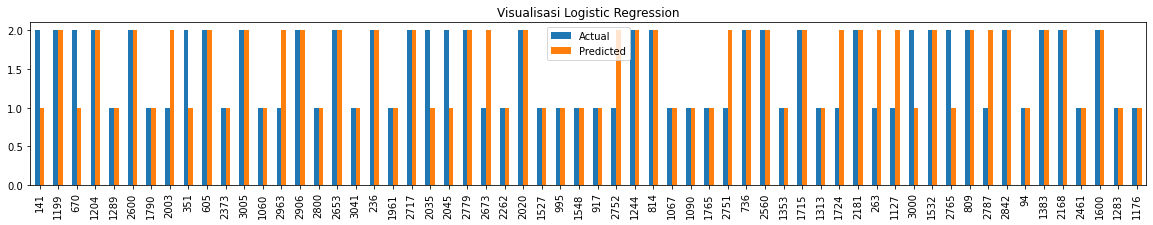

In [12]:
# Memisahkan atribut target (Y) dengan atribut predictor (X)
X = cancer_cleaned.drop(['TARGET_deathRate', 'TARGET_logistic', 'TARGET_softmax'], axis=1)
y = cancer_cleaned['TARGET_logistic']

X_normal = RobustScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=123)

Log_regr = LogisticRegression() 
Log_regr.fit(X_train, y_train)

y_pred = Log_regr.predict(X_test)

df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df4)

df4.sample(n=60).plot(kind='bar',figsize=(20,3))
plt.title("Visualisasi Logistic Regression")
plt.show()

In [13]:
print("Rata-rata akurasi:", Log_regr.score(X_test, y_test))

Rata-rata akurasi: 0.7885245901639344


### Nomor 2
[15] Implementasikan Softmax Regression dengan target yang digunakan adalah kolom TARGET_softmax. Gunakan method dari library sklearn.

a. Visualisasikan hasil regression yang didapat dengan membandingkan hasil prediksi dan nilai target aktual.

b. Tampilkan rata-rata akurasi yang didapat.

C:\Users\mirfa\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Actual,Predicted
2455,2,2
671,1,2
884,2,2
618,2,1
344,2,3
...,...,...
973,2,2
237,3,2
1051,1,1
593,1,1


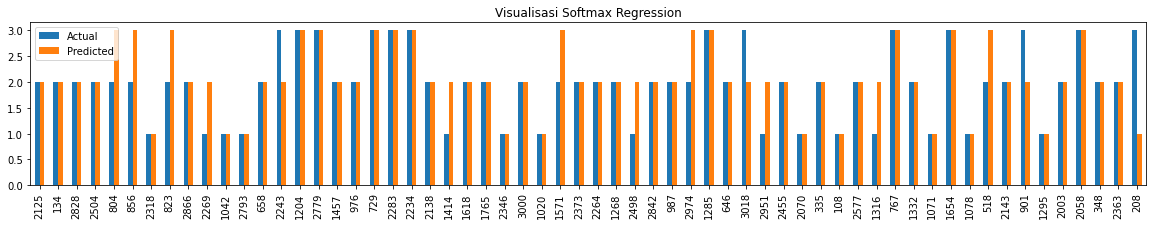

In [14]:
# Memisahkan atribut target (Y) dengan atribut predictor (X)
X = cancer_cleaned.drop(['TARGET_deathRate', 'TARGET_logistic', 'TARGET_softmax'], axis=1)
y = cancer_cleaned['TARGET_softmax']

X_normal = RobustScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=123)

Soft_regr = LogisticRegression(multi_class='multinomial')
Soft_regr.fit(X_train, y_train)

y_pred = Soft_regr.predict(X_test)

df5 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(df5)

df5.sample(n=60).plot(kind='bar',figsize=(20,3))
plt.title("Visualisasi Softmax Regression")
plt.show()

In [15]:
print("Rata-rata akurasi:", Soft_regr.score(X_test, y_test))

Rata-rata akurasi: 0.639344262295082
